[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/masanorihirano/pams/blob/main/examples/CI2002.ipynb)

In [2]:
# Please remove comment-out if necessary
# !pip install pams matplotlib

In [3]:
config = {
	"simulation": {
		"markets": ["Market"],
		"agents": ["FCNAgents"],
		"sessions": [
			{	"sessionName": 0,
				"iterationSteps": 100,
				"withOrderPlacement": True,
				"withOrderExecution": False,
				"withPrint": True,
				"hifreqSubmitRate": 1.0
			},
			{	"sessionName": 1,
				"iterationSteps": 500,
				"withOrderPlacement": True,
				"withOrderExecution": True,
				"withPrint": True
			}
		]
	},

	"Market": {
		"class": "Market",
		"tickSize": 0.00001,
		"marketPrice": 300.0
	},
	"FCNAgents": {
		"class": "FCNAgent",
		"numAgents": 100,

		"markets": ["Market"],
		"assetVolume": 50,
		"cashAmount": 10000,

		"fundamentalWeight": {"expon": [1.0]},
		"chartWeight": {"expon": [0.0]},
		"noiseWeight": {"expon": [1.0]},
		"meanReversionTime":{"uniform":[50,100]},
		"noiseScale": 0.001,
		"timeWindowSize": [100, 200],
		"orderMargin": [0.0, 0.1]
	}
}

In [4]:
import random
import matplotlib.pyplot as plt
from pams.runners import SequentialRunner
from pams.logs.market_step_loggers import MarketStepSaver

In [5]:
saver = MarketStepSaver()

runner = SequentialRunner(
    settings=config,
    prng=random.Random(42),
    logger=saver,
)
runner.main()

# INITIALIZATION TIME 0.0029982
# EXECUTION TIME 0.0818227


C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pams\market.py:446: UserWarning: order price does not accord to the tick size. price will be modified
  warnings.warn(


In [9]:
print(saver.market_step_logs)

[{'session_id': 0, 'market_time': 0, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 1, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 2, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 3, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 4, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 5, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 6, 'market_id': 0, 'market_name': 'Market', 'market_price': 300.0, 'fundamental_price': 300.0}, {'session_id': 0, 'market_time': 7, 'market_id': 0, 'market_name': 'Market', 'market_price': 300

In [7]:
market_price_dict = dict(sorted(map(lambda x: (x["market_time"], x["market_price"]), filter(lambda x: x["market_time"] >= 100, saver.market_step_logs))))

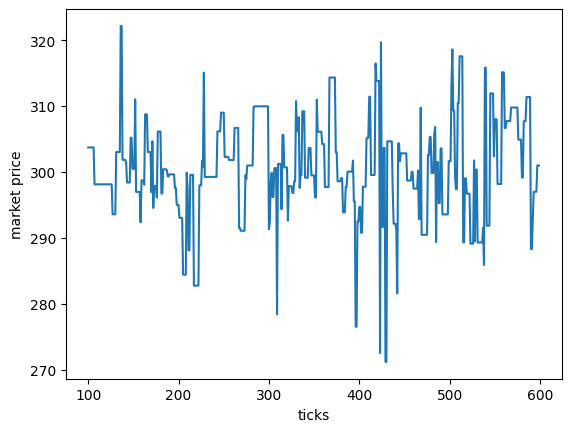

In [8]:
plt.plot(list(market_price_dict.keys()), list(market_price_dict.values()))
plt.xlabel("ticks")
plt.ylabel("market price")
plt.show()